In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import numpy as np
import torchvision
from torchvision import datasets, models
from torchvision import transforms
from torchvision.models import ResNet18_Weights
from torchvision.models import ResNet50_Weights
from torchvision.models import ResNet101_Weights
from torchvision.models import ResNet152_Weights
from torchvision.models import DenseNet201_Weights
from torchvision.models import EfficientNet_V2_S_Weights
from torch.optim.lr_scheduler import StepLR
import time
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
import os
from os import path
import datetime

In [2]:
print(torch.cuda.is_available())
print(torch.__version__)

False
2.0.1


In [3]:
input_dataset = '20_11_2023_08_17_08' #nocrop
#input_dataset = '20_11_2023_13_44_05' #withcrop

In [4]:
def dataset_path(timestamp: str):
    abs_path = os.getcwd()
    two_up =  path.abspath(path.join(abs_path ,"../.."))
    return path.join(two_up, 'data', f'{os.path.basename(abs_path)}', timestamp)

In [5]:
dataset_path(input_dataset)

'C:\\Users\\ilona\\OneDrive\\Dokumente\\MCI\\DiBSe\\DiBSE-Sem5\\GesamtProjekt\\TT_git\\tensionterminator\\data\\bodyside_finder\\20_11_2023_08_17_08'

In [6]:
transforms_wt = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])

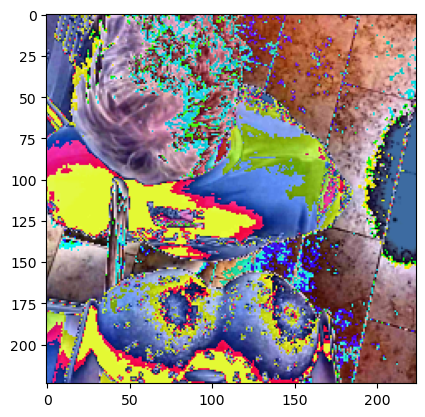

In [7]:
orig_set = datasets.ImageFolder(
    root=dataset_path(input_dataset),
    transform=transforms_wt
)
data, label = orig_set[100]
transform_test = T.ToPILImage()
plt.imshow(transform_test(data))


In [8]:
orig_set.classes

['left', 'middle', 'right']

In [9]:
len(orig_set)

10163

In [10]:
data, label = orig_set[0]
print(data.size())

torch.Size([3, 224, 224])


In [11]:
import torch
from torch.utils.data import random_split, DataLoader

data_loader = DataLoader(orig_set, batch_size=len(orig_set), shuffle=True)

# Define the dataset size
dataset_size = len(orig_set)

# Calculate the sizes for training, validation, and test sets
train_size = int(0.6 * dataset_size)
val_size = int(0.2 * dataset_size)
test_size = dataset_size - train_size - val_size

# Split the dataset into training, validation, and test sets
train_set, val_set, test_set = random_split(orig_set, [train_size, val_size, test_size])

In [12]:
val_data, val_label = val_set[1]
print(val_data.size())

torch.Size([3, 224, 224])


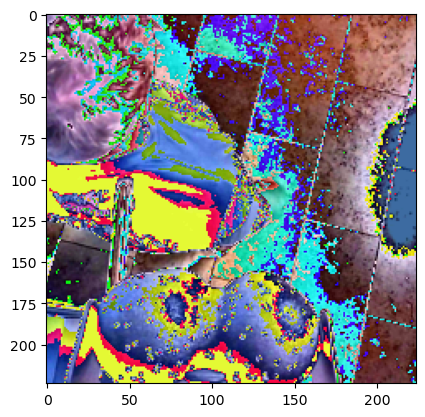

In [13]:
transform = T.ToPILImage()
plt.imshow(transform(val_data))

In [14]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=8,
    shuffle=True,
    num_workers=16
)

C:\Users\ilona\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:560: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
val_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=8,
    shuffle=True,
    num_workers=16
)

In [16]:
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=8,
    shuffle=True,
    num_workers=16
)

##### model = models.efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)

#print(model.fc)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)
print(model.fc)

In [18]:
num_features = model.classifier[-1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 2048),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(2048,1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024,500),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(500,3)
)
#print(model.fc)

In [19]:
#print(model)

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
exp_lr_scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

In [21]:
#execute next
import os
from os import path
import sys
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), '../..'))

from framework.frameworktest_pyt import FrameworkLogger
from framework.main_func import main_train_func

input_args = [train_loader, val_loader, model, criterion, optimizer, exp_lr_scheduler, device]

# Modell trainieren
logger = FrameworkLogger(5, model, main_train_func, input_args, "ilona_pytorch_efficientnet_nocrop")
#logger = FrameworkLogger(5, model, main_train_func, input_args, "ilona_pytorch_efficientnet_withcrop")
logger.train_model()
#logger.generate_statistics()

Epoch 0
Epoch: 0: Train: Loss: 0.0317 Acc: 0.9317 Val: Loss: 0.0009 Acc: 0.9985
{'loss': 0.03170675860951507, 'accuracy': 0.931684136390686, 'val_loss': 0.0009446323217133204, 'val_accuracy': 0.9985236220472441}
Epoch 0 took 2088.64 seconds
Epoch 1
Epoch: 1: Train: Loss: 0.0170 Acc: 0.9684 Val: Loss: 0.0026 Acc: 0.9941
{'loss': 0.017024132175950762, 'accuracy': 0.968381404876709, 'val_loss': 0.0025583123508143577, 'val_accuracy': 0.9940944881889764}
Epoch 1 took 2078.84 seconds
Epoch 2
Epoch: 2: Train: Loss: 0.0121 Acc: 0.9794 Val: Loss: 0.0216 Acc: 0.9769
{'loss': 0.012077496979264852, 'accuracy': 0.9793577790260315, 'val_loss': 0.021592392451032155, 'val_accuracy': 0.9768700787401575}
Epoch 2 took 2076.45 seconds
Epoch 3
Epoch: 3: Train: Loss: 0.0172 Acc: 0.9631 Val: Loss: 0.0046 Acc: 0.9906
{'loss': 0.01724694276047215, 'accuracy': 0.9631389379501343, 'val_loss': 0.00461115886954262, 'val_accuracy': 0.9906496062992126}
Epoch 3 took 2079.98 seconds
Epoch 4
Epoch: 4: Train: Loss: 0.01

start_time = time.time()

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()/inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)/inputs.size(0)


    exp_lr_scheduler.step()
    train_epoch_loss = running_loss / len(train_loader)
    train_epoch_acc = running_corrects / len(train_loader)

    model.eval()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in (val_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() / inputs.size(0)
        running_corrects += torch.sum(preds == labels.data) / inputs.size(0)

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = running_corrects.double() / len(val_loader)
    print(f"Epoch: {epoch}: Train: Loss: {train_epoch_loss:.4f} Acc: {train_epoch_acc:.4f} Val: Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

end_time = time.time()
print("Time:", end_time - start_time)

In [22]:
def get_time():
    return datetime.datetime.now().strftime("%d_%m_%Y_%H_%M_%S")

In [23]:
def model_save_path(timestamp: str):
    abs_path = os.getcwd()
    two_up =  path.abspath(path.join(abs_path ,"../.."))
    return path.join(two_up, 'models', f'{os.path.basename(abs_path)}', timestamp, f'model_{get_time()}.pt')

In [24]:
model_save_path(input_dataset)

'C:\\Users\\ilona\\OneDrive\\Dokumente\\MCI\\DiBSe\\DiBSE-Sem5\\GesamtProjekt\\TT_git\\tensionterminator\\models\\bodyside_finder\\20_11_2023_08_17_08\\model_21_11_2023_05_06_10.pt'

In [25]:
save_path = model_save_path(input_dataset)

os.makedirs(os.path.dirname(save_path), exist_ok=True)

torch.save(model.state_dict(), save_path)

test_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=4,
    shuffle=True,
    num_workers=16
)

In [26]:
num_correct = 0.0
for inputs, labels in test_loader:
    model.eval()
    inputs = inputs.to(device)
    labels = labels.to(device)
    predict_label = model(inputs)
    _, predicted = torch.max(predict_label,1)
    num_correct += (predicted == labels).float().sum()

    accuracy = num_correct/(len(test_loader)*test_loader.batch_size)

print(len(test_loader), test_loader.batch_size)
print("Test Accuracy: {}".format(accuracy))

255 8
Test Accuracy: 0.9921568632125854


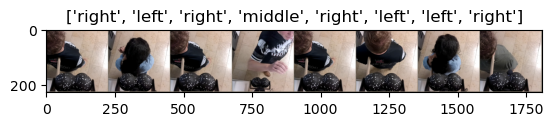

In [27]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.show()

def print_grid():
    inputs, classes = next(iter(test_loader))
    out = torchvision.utils.make_grid(inputs)
    class_names = orig_set.classes

    outputs = model(inputs.to(device))
    _, preds = torch.max(outputs, 1)

    imshow(out, title=[class_names[x] for x in preds])

print_grid()

In [28]:
#starttime 02:10
#endtime
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now()
formatted_timestamp = timestamp.strftime("%Y-%m-%d %H:%M:%S")
print("Formatted timestamp:", formatted_timestamp)

Formatted timestamp: 2023-11-21 05:11:18
